<a href="https://colab.research.google.com/github/Zamibrahim/3025/blob/main/animal%26vertebrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/vertebrate(4).csv')

In [4]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [5]:
data['Class']= data['Class'].replace(['reptiles','fishes','amphibians','birds'],'non-mammals')

In [6]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [7]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [8]:
from sklearn import tree

In [9]:
y=data['Class']

In [10]:
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [11]:
X =data.drop(['Name','Class'], axis=1)

In [12]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [13]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [14]:
clf #initialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
clf=clf.fit(X,y)

In [16]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
import pydotplus

In [18]:
from IPython.display import Image

In [19]:
dot_data=tree.export_graphviz(clf,feature_names=X.columns,class_names=['mammals','non-mammals'],filled=True,out_file=None)

In [20]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mammals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mammals", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [21]:
graph=pydotplus.graph_from_dot_data(dot_data)

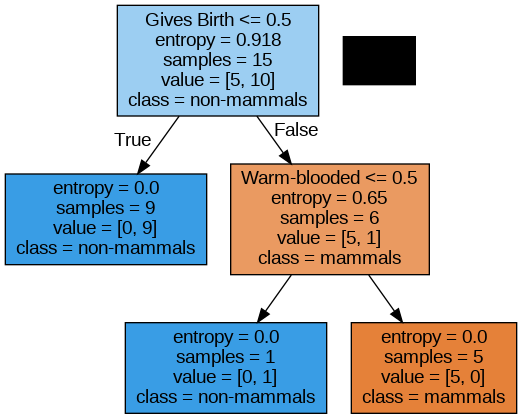

In [22]:
graph
Image(graph.create_png())

In [23]:
testData=[['gila monister',0,0,0,0,1,1,'non-mammals'],
          ['platypus',1,0,0,0,1,1,'mammals'],
          ['owl',1,0,0,1,1,0,'non-mammals'],
          ['dolphin',1,1,1,0,0,0,'mammals']]

In [24]:
testData

[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [25]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [26]:
testData=pd.DataFrame(testData,columns=data.columns)

In [27]:
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [28]:
testY=testData['Class']

In [29]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [30]:
testX=testData.drop(['Name','Class'],axis=1)

In [31]:
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [32]:
predY=clf.predict(testX)

In [33]:
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [34]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [35]:
3/4*100

75.0

In [36]:
predictions=pd.concat([testData['Name'],testData['Class'],pd.Series(predY,name='Predicted Class')], axis=1)

In [37]:
predictions

,Name,Class,Predicted Class
0,gila monister,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


In [38]:
3/4*100

75.0

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(testY,predY) #***checks y

0.75

In [41]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


In [42]:
#animal dataset

In [43]:
data = pd.read_csv("/content/animals.csv", header='infer')

In [44]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [45]:
data.columns = data.columns.str.strip()

In [46]:
pd.crosstab([data['Hair'], data['Feathers'], data['Eggs'], data['Milk'], data['Airborne'], data['Aquatic'], data['Predator'], data['Teeth'], data['Backbone'], data['Breathes'], data['Venemous'], data['Fins'], data['Legs'], data['Tails'], data['Domestic'], data['Catsize']], data['Class'])

Class                                                                                                                1  \
Hair Feathers Eggs Milk Airborne Aquatic Predator Teeth Backbone Breathes Venemous Fins Legs Tails Domestic Catsize      
0    0        0    0    0        0       1        0     0        1        1        0    8    1     0        0        0   
                                 1       1        1     1        0        1        0    0    1     0        0        0   
                   1    0        1       1        1     1        1        0        1    0    1     0        1        2   
              1    0    0        0       0        0     0        1        0        0    0    0     0        0        0   
                                                                                        6    0     0        0        0   
                                         1        0     0        0        0        0    0    0     0        0        0   
                                                  1     1        1        0        0    0    1     0        0        0   
                                                                          1        0    0    1     0        0        0   
                                 1       0        1     1        0        0        1    0    1     0        0        0   
                                                                                                   1        0        0   
                                                                 1        0        0    4    0     0        0        0   
                                         1        0     0        0        0        0    4    0     0        0        0   
                                                                                        5    0     0        0        0   
                                                                                        6    0     0        0        0   
                                                                                        8    0     0        1        0   
                                                                          1        0    0    0     0        0        0   
                                                  1     1        0        0        1    0    1     0        0        0   
                                                                                                            1        0   
                                                                          1        1    0    1     0        1        0   
                                                                 1        0        0    4    0     0        0        0   
                                                                                             1     0        0        0   
                                                                          1        0    4    0     0        0        0   
                        1        0       0        0     0        1        0        0    6    0     0        0        0   
                                         1        0     0        1        0        0    6    0     0        0        0   
     1        1    0    0        0       0        0     1        1        0        0    2    1     0        1        0   
                                         1        0     1        1        0        0    2    1     0        0        0   
                                                                                                            1        0   
                                 1       1        0     1        1        0        0    2    1     0        1        0   
                        1        0       0        0     1        1        0        0    2    1     0        0        0   
                                                                                                            1        0   
                                                                                                

In [47]:
from sklearn import tree

In [48]:
y = data['Class']

In [49]:
X = data.drop(['Sr', 'Class'], axis=1)

In [50]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [51]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [52]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [53]:
clf = clf.fit(X,y)

In [54]:
import pydotplus

In [55]:
from IPython.display import Image

In [56]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['1', '2', '3', '4', '5', '6', '7'],
                              filled=True, out_file=None)

In [57]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Milk <= 0.5\\nentropy = 2.361\\nsamples = 90\\nvalue = [37, 18, 3, 12, 4, 7, 9]\\nclass = 1", fillcolor="#f8decb"] ;\n1 [label="Teeth <= 0.5\\nentropy = 2.35\\nsamples = 53\\nvalue = [0, 18, 3, 12, 4, 7, 9]\\nclass = 2", fillcolor="#f4fbe2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Feathers <= 0.5\\nentropy = 1.463\\nsamples = 34\\nvalue = [0, 18, 0, 0, 0, 7, 9]\\nclass = 2", fillcolor="#e5f6b8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 16\\nvalue = [0, 0, 0, 0, 0, 7, 9]\\nclass = 7", fillcolor="#f9d3e4"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0, 0, 0, 0, 0]\\nclass = 2", fillcolor="#b7e539"] ;\n2 -> 4 ;\n5 [label="Fins <= 0.5\\nentropy = 1.312\\nsamples = 19\\nvalue = [0, 0, 3, 12, 4, 0, 0]\\nclass = 4", fillcolor="#95f1f0"] ;\n1 -> 5 ;\n6 [label="entropy = 0.985\\nsamples = 7\\nva

In [58]:
graph = pydotplus.graph_from_dot_data(dot_data)

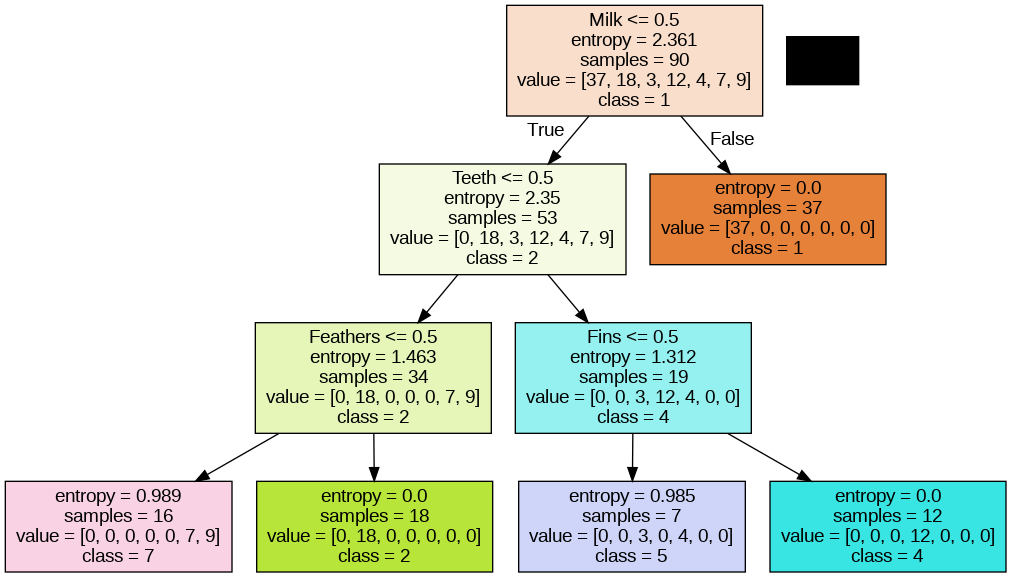

In [59]:
graph
Image(graph.create_png())

In [60]:
testData = [[91,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3],
            [92,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3],
            [93,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4],
            [94,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1],
            [95,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1],
            [96,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2],
            [97,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1],
            [98,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6],
            [99,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1],
            [100,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7],
            [101,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2]]

In [61]:
data.columns

Index(['Sr', 'Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic',
       'Predator', 'Teeth', 'Backbone', 'Breathes', 'Venemous', 'Fins', 'Legs',
       'Tails', 'Domestic', 'Catsize', 'Class'],
      dtype='object')

In [62]:
testData = pd.DataFrame(testData, columns=data.columns)

In [63]:
testY = testData['Class']

In [64]:
testY

0     3
1     3
2     4
3     1
4     1
5     2
6     1
7     6
8     1
9     7
10    2
Name: Class, dtype: int64

In [65]:
testX = testData.drop(['Sr', 'Class'], axis=1)

In [66]:
testX

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1
1,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
3,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
5,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
7,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
8,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
9,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [67]:
predY = clf.predict(testX)

In [68]:
predY

array([7, 5, 4, 1, 1, 2, 1, 7, 1, 7, 2])

In [69]:
testY

0     3
1     3
2     4
3     1
4     1
5     2
6     1
7     6
8     1
9     7
10    2
Name: Class, dtype: int64

In [70]:
predictions = pd.concat([testData['Sr'], testData['Class'], pd.Series(predY, name="Predicted Class")], axis=1)

In [71]:
predictions

,Sr,Class,Predicted Class
0,91,3,7
1,92,3,5
2,93,4,4
3,94,1,1
4,95,1,1
5,96,2,2
6,97,1,1
7,98,6,7
8,99,1,1
9,100,7,7


In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(testY, predY)

0.7272727272727273

In [74]:
print("Accuracy on test data is %.2f" % (accuracy_score(testY, predY)*100))

Accuracy on test data is 72.73
